## ENGG* 6600 Security of Cyber Grids
### Prof. Hadis Karimipour

### Project Title - Identifying suspicious URLs using Supervised Learning and Lexical Analysis

#### Coded by Ruthvik Raja M.V (1162634) and Debanjan Mitra (1126062)

# Binary Classification using SVM
## Imports

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Loading Malware, Spam, Phishing and Defacement Datasets
### Each Dataset also consists of Benign URL's

In [32]:
malware=pd.read_csv("Dataset/Malware.csv")
spam=pd.read_csv("Dataset/Spam.csv")
phishing=pd.read_csv("Dataset/Phishing.csv")
defacement=pd.read_csv("Dataset/Defacement.csv")

### Data Cleaning: Strip whitespaces from the column names and drop NA values

In [33]:
malware = malware.rename(str.strip, axis='columns')
spam=spam.rename(str.strip, axis="columns")
phishing=phishing.rename(str.strip, axis="columns")
defacement=defacement.rename(str.strip, axis="columns")

In [34]:
malware.info() # NumerRate_Extension values are missing for most of the rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14493 entries, 0 to 14492
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      14493 non-null  int64  
 1   domain_token_count               14493 non-null  int64  
 2   path_token_count                 14493 non-null  int64  
 3   avgdomaintokenlen                14493 non-null  float64
 4   longdomaintokenlen               14493 non-null  int64  
 5   avgpathtokenlen                  14482 non-null  float64
 6   tld                              14493 non-null  int64  
 7   charcompvowels                   14493 non-null  int64  
 8   charcompace                      14493 non-null  int64  
 9   ldl_url                          14493 non-null  int64  
 10  ldl_domain                       14493 non-null  int64  
 11  ldl_path                         14493 non-null  int64  
 12  ldl_filename      

In [35]:
spam.info() # NumerRate_Extension values are missing for most of the rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14479 entries, 0 to 14478
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      14479 non-null  int64  
 1   domain_token_count               14479 non-null  int64  
 2   path_token_count                 14479 non-null  int64  
 3   avgdomaintokenlen                14479 non-null  float64
 4   longdomaintokenlen               14479 non-null  int64  
 5   avgpathtokenlen                  14467 non-null  float64
 6   tld                              14479 non-null  int64  
 7   charcompvowels                   14479 non-null  int64  
 8   charcompace                      14479 non-null  int64  
 9   ldl_url                          14479 non-null  int64  
 10  ldl_domain                       14479 non-null  int64  
 11  ldl_path                         14479 non-null  int64  
 12  ldl_filename      

In [36]:
phishing.info() # NumerRate_Extension values are missing for most of the rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15367 entries, 0 to 15366
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      15367 non-null  int64  
 1   domain_token_count               15367 non-null  int64  
 2   path_token_count                 15367 non-null  int64  
 3   avgdomaintokenlen                15367 non-null  float64
 4   longdomaintokenlen               15367 non-null  int64  
 5   avgpathtokenlen                  15096 non-null  float64
 6   tld                              15367 non-null  int64  
 7   charcompvowels                   15367 non-null  int64  
 8   charcompace                      15367 non-null  int64  
 9   ldl_url                          15367 non-null  int64  
 10  ldl_domain                       15367 non-null  int64  
 11  ldl_path                         15367 non-null  int64  
 12  ldl_filename      

In [37]:
defacement.info() # Entropy_DirectoryName and NumberRate_Extension values are missing for most of the rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15711 entries, 0 to 15710
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      15711 non-null  int64  
 1   domain_token_count               15711 non-null  int64  
 2   path_token_count                 15711 non-null  int64  
 3   avgdomaintokenlen                15711 non-null  float64
 4   longdomaintokenlen               15711 non-null  int64  
 5   avgpathtokenlen                  15704 non-null  float64
 6   tld                              15711 non-null  int64  
 7   charcompvowels                   15711 non-null  int64  
 8   charcompace                      15711 non-null  int64  
 9   ldl_url                          15711 non-null  int64  
 10  ldl_domain                       15711 non-null  int64  
 11  ldl_path                         15711 non-null  int64  
 12  ldl_filename      

## SVM [Using all the INPUT Features]:-

### Malware and Benign
### In Malware Dataset nearly 40% of values are NULL values in the NumberRate_Extension column

In [38]:
malware1=malware.drop(["NumberRate_Extension"], axis=1)
malware1=malware1.dropna()
malware1=shuffle(malware1)
malware1=malware1.reset_index(drop=True)
malware1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12442 entries, 0 to 12441
Data columns (total 79 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      12442 non-null  int64  
 1   domain_token_count               12442 non-null  int64  
 2   path_token_count                 12442 non-null  int64  
 3   avgdomaintokenlen                12442 non-null  float64
 4   longdomaintokenlen               12442 non-null  int64  
 5   avgpathtokenlen                  12442 non-null  float64
 6   tld                              12442 non-null  int64  
 7   charcompvowels                   12442 non-null  int64  
 8   charcompace                      12442 non-null  int64  
 9   ldl_url                          12442 non-null  int64  
 10  ldl_domain                       12442 non-null  int64  
 11  ldl_path                         12442 non-null  int64  
 12  ldl_filename      

#### If URL_Type_obf_Type == "malware" [class label 0], else [class label 1]

In [39]:
# Function to label the classes in a DataFrame
def class_labels(class_name):
    if(class_name=="malware"):
        return 0
    else:
        return 1

In [40]:
# Function for Data Scaling
def dataset_scaling(dataset):
        
  # Scaling dataset
  scaler = MinMaxScaler(feature_range=(0, 1)) # Scaling object for features 
  
  df_X = dataset.loc[:, dataset.columns!="URL_Type_obf_Type"]
  df_Y = dataset[["URL_Type_obf_Type"]]
  
  df_X = scaler.fit_transform(df_X)
  dataset1=np.concatenate((df_X, df_Y), axis=1)
  
  return dataset1, scaler  

malware1["URL_Type_obf_Type"]=malware1["URL_Type_obf_Type"].apply(lambda x:class_labels(x))
malware_columns=malware1.columns
malware2, scaler=dataset_scaling(malware1) # Scaling the Dataset
malware2=pd.DataFrame(malware2,columns=malware_columns)

#### Splitting the samples

In [41]:
train_x, test_x, train_y, test_y=train_test_split(malware2.loc[:, malware2.columns!="URL_Type_obf_Type"], malware2["URL_Type_obf_Type"], random_state=0, test_size=0.25)

In [42]:
# Machine Learning Models
start = time.time()
svm=SVC()
svm.fit(train_x, train_y)
y_score_malware = svm.decision_function(test_x)
predicted_test=svm.predict(test_x)
end = time.time()
print((end-start)) # Prints Time taken by the Model to train and execute the samples in seconds

3.3093395233154297


In [43]:
# Predicting the Output
predicted_train=svm.predict(train_x)

In [44]:
# Performance Metrics for Test Data
accuracy_score(test_y, predicted_test) * 100 

93.53905496624878

In [45]:
# Performance Metrics for Train Data
accuracy_score(train_y, predicted_train) * 100 

93.6769906762405

In [46]:
# confusion matrix
matrix = confusion_matrix(train_y,predicted_train,labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(train_y,predicted_train,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(train_y,predicted_train,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[4853   59]
 [ 531 3888]]
Outcome values : 
 4853 59 531 3888
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.99      0.94      4912
           0       0.99      0.88      0.93      4419

    accuracy                           0.94      9331
   macro avg       0.94      0.93      0.94      9331
weighted avg       0.94      0.94      0.94      9331



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.98')

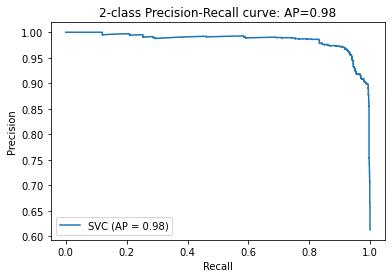

In [47]:
average_precision = average_precision_score(test_y, y_score_malware)
disp = plot_precision_recall_curve(svm, test_x, test_y)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Spam and Benign 

In [48]:
# In Spam Dataset nearly 34% of values are NULL values in the NumberRate_Extension column
spam1=spam.drop(["NumberRate_Extension"], axis=1)
spam1=spam1.dropna()
spam1=shuffle(spam1)
spam1=spam1.reset_index(drop=True)
spam1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12420 entries, 0 to 12419
Data columns (total 79 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      12420 non-null  int64  
 1   domain_token_count               12420 non-null  int64  
 2   path_token_count                 12420 non-null  int64  
 3   avgdomaintokenlen                12420 non-null  float64
 4   longdomaintokenlen               12420 non-null  int64  
 5   avgpathtokenlen                  12420 non-null  float64
 6   tld                              12420 non-null  int64  
 7   charcompvowels                   12420 non-null  int64  
 8   charcompace                      12420 non-null  int64  
 9   ldl_url                          12420 non-null  int64  
 10  ldl_domain                       12420 non-null  int64  
 11  ldl_path                         12420 non-null  int64  
 12  ldl_filename      

#### If URL_Type_obf_Type == "spam" [class label 0], else [class label 1]

In [49]:
# Function to label the classes in a DataFrame
def class_labels_spam(class_name):
    if(class_name=="spam"):
        return 0
    else:
        return 1
    
spam1["URL_Type_obf_Type"]=spam1["URL_Type_obf_Type"].apply(lambda x:class_labels_spam(x))
spam_columns=spam1.columns
spam2, scaler=dataset_scaling(spam1) # Scaling the Dataset

spam2=pd.DataFrame(spam2,columns=spam_columns)

In [50]:
# Splitting the samples
train_x, test_x, train_y, test_y=train_test_split(spam2.loc[:, spam2.columns!="URL_Type_obf_Type"], spam2["URL_Type_obf_Type"], random_state=0, test_size=0.25)

In [51]:
# Machine Learning Models
start = time.time()
svm=SVC()
svm.fit(train_x, train_y)
predicted_test=svm.predict(test_x)
y_score_spam = svm.decision_function(test_x)
end = time.time()
print((end-start)) # Prints Time taken by the Model to train and execute the samples in seconds

0.5718903541564941


In [52]:
# Predicting the Output
predicted_train=svm.predict(train_x)

In [53]:
# Performance Metrics
accuracy_score(test_y, predicted_test) * 100 # 98.93% for testing

98.93719806763285

In [54]:
accuracy_score(train_y, predicted_train) * 100 # 99.11% for training

99.11969940955449

In [55]:
# confusion matrix
matrix = confusion_matrix(train_y,predicted_train,labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(train_y,predicted_train,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(train_y,predicted_train,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[4839   70]
 [  12 4394]]
Outcome values : 
 4839 70 12 4394
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      0.99      4909
           0       0.98      1.00      0.99      4406

    accuracy                           0.99      9315
   macro avg       0.99      0.99      0.99      9315
weighted avg       0.99      0.99      0.99      9315



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

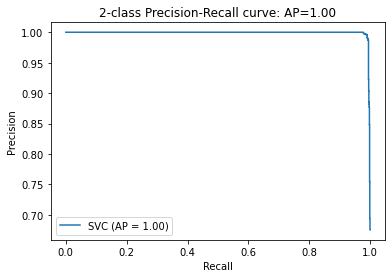

In [56]:
average_precision = average_precision_score(test_y, y_score_spam)
disp = plot_precision_recall_curve(svm, test_x, test_y)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


### Phishing and Benign

In [57]:
# In Phishing Dataset nearly 48% of values are NULL values in the NumberRate_Extension column

phishing1=phishing.drop(["NumberRate_Extension"], axis=1)
phishing1=phishing1.dropna()
phishing1=shuffle(phishing1)
phishing1=phishing1.reset_index(drop=True)
phishing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13084 entries, 0 to 13083
Data columns (total 79 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      13084 non-null  int64  
 1   domain_token_count               13084 non-null  int64  
 2   path_token_count                 13084 non-null  int64  
 3   avgdomaintokenlen                13084 non-null  float64
 4   longdomaintokenlen               13084 non-null  int64  
 5   avgpathtokenlen                  13084 non-null  float64
 6   tld                              13084 non-null  int64  
 7   charcompvowels                   13084 non-null  int64  
 8   charcompace                      13084 non-null  int64  
 9   ldl_url                          13084 non-null  int64  
 10  ldl_domain                       13084 non-null  int64  
 11  ldl_path                         13084 non-null  int64  
 12  ldl_filename      

#### If URL_Type_obf_Type == "phishing" [class label 0], else [class label 1]

In [58]:
# Function to label the classes in a DataFrame
def class_labels_phishing(class_name):
    if(class_name=="phishing"):
        return 0
    else:
        return 1

In [59]:
phishing1["URL_Type_obf_Type"]=phishing1["URL_Type_obf_Type"].apply(lambda x:class_labels_phishing(x))
phishing_columns=phishing1.columns
phishing2, scaler=dataset_scaling(phishing1) # Scaling the Dataset
phishing2=pd.DataFrame(phishing2,columns=phishing_columns)

In [60]:
# Splitting the samples
train_x, test_x, train_y, test_y=train_test_split(phishing2.loc[:, phishing2.columns!="URL_Type_obf_Type"], phishing2["URL_Type_obf_Type"], random_state=0, test_size=0.25)

In [61]:
# Machine Learning Models
start = time.time()
svm=SVC()
svm.fit(train_x, train_y)
predicted_test=svm.predict(test_x)
y_score_phising = svm.decision_function(test_x)
end = time.time()
print((end-start)) # Prints Time taken by the Model to train and execute the samples in seconds

2.3750665187835693


In [62]:
# Predicting the Output
predicted_train=svm.predict(train_x)

In [63]:
# Performance Metrics
accuracy_score(test_y, predicted_test) * 100 # 95.29% for testing

95.29195964536838

In [64]:
accuracy_score(train_y, predicted_train) * 100 # 95.91% for training

95.91358402119637

In [65]:
# confusion matrix
matrix = confusion_matrix(train_y,predicted_train,labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(train_y,predicted_train,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(train_y,predicted_train,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[4786  136]
 [ 265 4626]]
Outcome values : 
 4786 136 265 4626
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.97      0.96      4922
           0       0.97      0.95      0.96      4891

    accuracy                           0.96      9813
   macro avg       0.96      0.96      0.96      9813
weighted avg       0.96      0.96      0.96      9813



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.99')

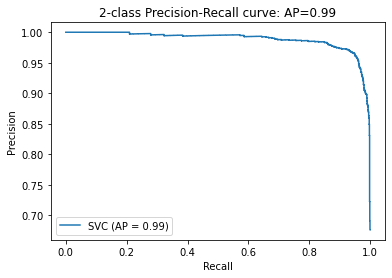

In [66]:
average_precision = average_precision_score(test_y, y_score_phising)
disp = plot_precision_recall_curve(svm, test_x, test_y)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Defacement and Benign
#### In Defacement Dataset nearly 39% of values are NULL values in the Entropy_DirectoryName and 32% of values are NULL values in the NumberRate_Extension column
#### If we are using the dropna() on the Defacement Dataset, the number of rows falls from 15711 to 5186 rows but if we drop the above two columns and apply dropna() then the number of rows reduces from 15711 to 15477 so, better to drop the two columns

In [67]:
defacement1=defacement.drop(["NumberRate_Extension", "Entropy_DirectoryName"], axis=1)
defacement1=defacement1.dropna()
defacement1=shuffle(defacement1) 
defacement1=defacement1.reset_index(drop=True)
defacement1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15477 entries, 0 to 15476
Data columns (total 78 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      15477 non-null  int64  
 1   domain_token_count               15477 non-null  int64  
 2   path_token_count                 15477 non-null  int64  
 3   avgdomaintokenlen                15477 non-null  float64
 4   longdomaintokenlen               15477 non-null  int64  
 5   avgpathtokenlen                  15477 non-null  float64
 6   tld                              15477 non-null  int64  
 7   charcompvowels                   15477 non-null  int64  
 8   charcompace                      15477 non-null  int64  
 9   ldl_url                          15477 non-null  int64  
 10  ldl_domain                       15477 non-null  int64  
 11  ldl_path                         15477 non-null  int64  
 12  ldl_filename      

#### If URL_Type_obf_Type == "Defacement" [class label 0], else [class label 1]

In [68]:
# Function to label the classes in a DataFrame
def class_labels_defacement(class_name):
    if(class_name=="Defacement"):
        return 0
    else:
        return 1

In [69]:
defacement1["URL_Type_obf_Type"]=defacement1["URL_Type_obf_Type"].apply(lambda x:class_labels_defacement(x))
defacement_columns=defacement1.columns
defacement2, scaler=dataset_scaling(defacement1) # Scaling the Dataset
defacement2=pd.DataFrame(defacement2,columns=defacement_columns)

In [70]:
# Splitting the samples
train_x, test_x, train_y, test_y=train_test_split(defacement2.loc[:, defacement2.columns!="URL_Type_obf_Type"], defacement2["URL_Type_obf_Type"], random_state=0, test_size=0.25)

In [71]:
# Machine Learning Models
start = time.time()
svm=SVC()
svm.fit(train_x, train_y)
predicted_test=svm.predict(test_x)
y_score_defacement = svm.decision_function(test_x)
end = time.time()
print((end-start)) # Prints Time taken by the Model to train and execute the samples in seconds

2.001386880874634


In [72]:
# Predicting the Output
predicted_train=svm.predict(train_x)

In [73]:
# Performance Metrics
accuracy_score(test_y, predicted_test) * 100 # 97.64% for testing

97.64857881136952

In [74]:
accuracy_score(train_y, predicted_train) * 100 # 97.92% for training

97.92366675282157

In [75]:
# confusion matrix
matrix = confusion_matrix(train_y,predicted_train,labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(train_y,predicted_train,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(train_y,predicted_train,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[5619   63]
 [ 178 5747]]
Outcome values : 
 5619 63 178 5747
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.99      0.98      5682
           0       0.99      0.97      0.98      5925

    accuracy                           0.98     11607
   macro avg       0.98      0.98      0.98     11607
weighted avg       0.98      0.98      0.98     11607



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

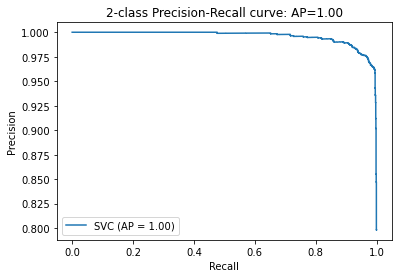

In [76]:
average_precision = average_precision_score(test_y, y_score_defacement)
disp = plot_precision_recall_curve(svm, test_x, test_y)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### <---------------------- THE END -----------------------> ###